# Post-processing
In this section, we will look at how to access and visualize data from saved files.
We will also look at warm/hot starting of an optimization using
previously saved data.

## Saving optimization data to a file
We saw earlier in [Basic User Guide](./basic.ipynb) how to save optimization data.
Since our goal is to understand how we can use the saved files, we begin by
running our standard problem and saving it to a file named `postprocessing.hdf5`.

In [1]:
import numpy as np

def objective(x):
    return x[0]**2 + x[1]**2

def gradient(x):
    return np.array([2*x[0], 2*x[1]])

def constraints(x):
    return  np.array([x[0] + x[1] - 1, 3*x[0] + 2*x[1] - 1])

def jacobian(x):
    return np.array([[1, 1], [3, 2]])

x_lower = np.array([0.4, -np.inf])
x_upper = np.array([np.inf, 0.6])
num_eqcon = 1
x0 = np.array([2,3])

from pyslsqp import optimize
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, meq=num_eqcon, xl=x_lower, xu=x_upper,
                   save_itr='all', save_vars=['x', 'objective', 'optimality', 'feasibility', 'step', 'mode', 'iter', 'majiter', 'ismajor', 'constraints', 'gradient', 'multipliers', 'jacobian'],
                   save_filename="postprocessing.hdf5")

Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 1.232595e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 4
            Number of function evaluations       : 4
            Number of derivative evaluations     : 4
            Average Derivative evaluation time   : 0.000042 s per evaluation
            Average Function evaluation time     : 0.000043 s per evaluation
            Total Function evaluation time       : 0.000169 s [  0.68%]
            Total Derivative evaluation time     : 0.000173 s [  0.70%]
            Optimizer time                       : 0.000115 s [  0.46%]
            Processing time                      : 0.024273 s [ 98.15%]
            Visualization time                   : 0.000000 s [  0.00%]
            Total optimization time              : 0.024730 s [100.00%]
         

## Viewing saved file contents
To view what data is available in a saved file, we call the `print_file_contents()` utility with the saved file name `postprocessing.hdf5`.

In [2]:
from pyslsqp.postprocessing import print_file_contents
print_file_contents('postprocessing.hdf5')

Available data in the file:
---------------------------
     Attributes of optimization  : ['acc', 'con_scaler', 'finite_diff_abs_step', 'finite_diff_rel_step', 'hot_start', 'iprint', 'keep_plot_open', 'load_filename', 'm', 'maxiter', 'meq', 'n', 'obj_scaler', 'save_figname', 'save_filename', 'save_itr', 'save_vars', 'summary_filename', 'visualize', 'visualize_vars', 'warm_start', 'x0', 'x_scaler', 'xl', 'xu']
     Saved variable iterates     : ['constraints', 'feasibility', 'gradient', 'ismajor', 'iter', 'jacobian', 'majiter', 'mode', 'multipliers', 'objective', 'optimality', 'step', 'x']
     Results of Optimization     : ['constraints', 'feasibility', 'fev_time', 'gev_time', 'gradient', 'jacobian', 'message', 'multipliers', 'nfev', 'ngev', 'num_majiter', 'objective', 'optimality', 'optimizer_time', 'processing_time', 'save_filename', 'status', 'success', 'summary_filename', 'total_time', 'visualization_time', 'x']


## Loading results and attributes
In the previous code block, we saw that there are mainly three types of information available in a saved file: *attributes*, *variable iterates*, and *results*.
Attributes and results of optimization can be loaded as dictionaries by simply calling the `load_attributes()` and `load_results()` utility functions with the saved file name as shown below.

In [3]:
from pyslsqp.postprocessing import load_attributes, load_results, print_dict_as_table
attributes = load_attributes('postprocessing.hdf5')
results = load_results('postprocessing.hdf5')

print("Attributes:")
print_dict_as_table(attributes)

print("Results:")
print_dict_as_table(results)

Attributes:
--------------------------------------------------
        acc                      : 1e-06
        con_scaler               : 1.0
        finite_diff_abs_step     : None (undefined)
        finite_diff_rel_step     : 1.4901161193847656e-08
        hot_start                : False
        iprint                   : 1
        keep_plot_open           : False
        load_filename            : None (undefined)
        m                        : 2
        maxiter                  : 100
        meq                      : 1
        n                        : 2
        obj_scaler               : 1.0
        save_figname             : slsqp_plot.pdf
        save_filename            : postprocessing.hdf5
        save_itr                 : all
        save_vars                : ['x', 'objective', 'optimality', 'feasibility', 'step', 'mode', 'iter', 'majiter', 'ismajor', 'constraints', 'gradient', 'multipliers', 'jacobian']
        summary_filename         : slsqp_summary.out
       

## Loading variable iterates
To load variable iterates from a saved file, we can use the `load_variable()` utility function from `pyslsqp.postprocessing`.
This function needs two arguments. 
The first argument is the file name and the second argument is the list of variable names to load.
The function returns a dictionary with *keys* as variable names and *values* as the list of variable iterates corresponding to a variable name.

In [4]:
from pyslsqp.postprocessing import load_variables
vars = load_variables('postprocessing.hdf5', ['x', 'objective', 'optimality', 'feasibility', 'step', 'mode', 'iter', 'majiter', 'ismajor', 'constraints', 'gradient', 'multipliers', 'jacobian'])
print_dict_as_table(vars)


--------------------------------------------------
        x                        : [array([2. , 0.6]), array([0.4, 0.6]), array([0.4, 0.6]), array([0.53333333, 0.46666667]), array([0.53333333, 0.46666667]), array([0.5, 0.5]), array([0.5, 0.5]), array([0.5, 0.5])]
        objective                : [4.36, 0.5200000000000002, 0.5200000000000002, 0.5022222222222221, 0.5022222222222221, 0.5, 0.5, 0.5]
        optimality               : [99.0, 3.8399999999999985, 0.0, 7.697546304067748e-16, 0.0, 1.5173048003210468e-16, 0.0, 1.232595164407831e-31]
        feasibility              : [99.0, 4.440892098500626e-16, 4.440892098500626e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 0.0, 0.0, 0.0]
        step                     : [99.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
        mode                     : [0, 1, -1, 1, -1, 1, -1, 0]
        iter                     : [0, 1, 2, 3, 4, 5, 6, 7]
        majiter                  : [0, 1, 1, 2, 2, 3, 3, 4]
        ismajor                  : [Tr

Users have the option to specify `itr_start` and `itr_end`, which will load all variable iterates between and including these two points.
By default, `itr_start` is set to *0* and `itr_end` to *-1*.
If the saved file contains all iterations of the optimization algorithm, but the user only needs the variables from major iterations between `itr_start` and `itr_end`,
they can set `major_only=True` in the function call.
In the following code, we only load the major iterations 1 ,2, and 3. 
The variables we load are the major iteration and optimization iteration number, 
the *ismajor* indicator, $x_1$, the objective, optimality, feasibililty, and the constraint derivative $\frac{\partial c_1}{\partial x_1}(x)$.

In [5]:
vars = load_variables('postprocessing.hdf5', ['majiter', 'iter', 'ismajor', 'x[0]', 'objective', 'optimality', 'feasibility', 'jacobian[0,0]'], itr_start=1, itr_end=3, major_only=True)
print_dict_as_table(vars)

--------------------------------------------------
        majiter                  : [1, 2, 3]
        iter                     : [1, 3, 5]
        ismajor                  : [True, True, True]
        x[0]                     : [0.40000000000000036, 0.5333333333333333, 0.5000000000000002]
        objective                : [0.5200000000000002, 0.5022222222222221, 0.5]
        optimality               : [3.8399999999999985, 7.697546304067748e-16, 1.5173048003210468e-16]
        feasibility              : [4.440892098500626e-16, 1.1102230246251565e-16, 0.0]
        jacobian[0,0]            : [1.0, 1.0, 1.0]
--------------------------------------------------


## Visualizing saved optimization
To visualize a saved optimization, we use the `visualize()` utility from `pyslsqp.postprocessing`.
The two required arguments are the saved file name and the list of variable names to visualize.
This function also optionally takes in keyword arguments `itr_start`, `itr_end`, and `major_only`,
with their meanings exactly the same as discussed above for the `load_variables` function.
The final optimization plot can be saved by setting the keyword argument
`save_figname` which is `None` by default.

In the following code, we plot **all** the **major** iterations for $x_1$, objective, optimality, feasibility, and $\frac{\partial c_1}{\partial x_1}(x)$.

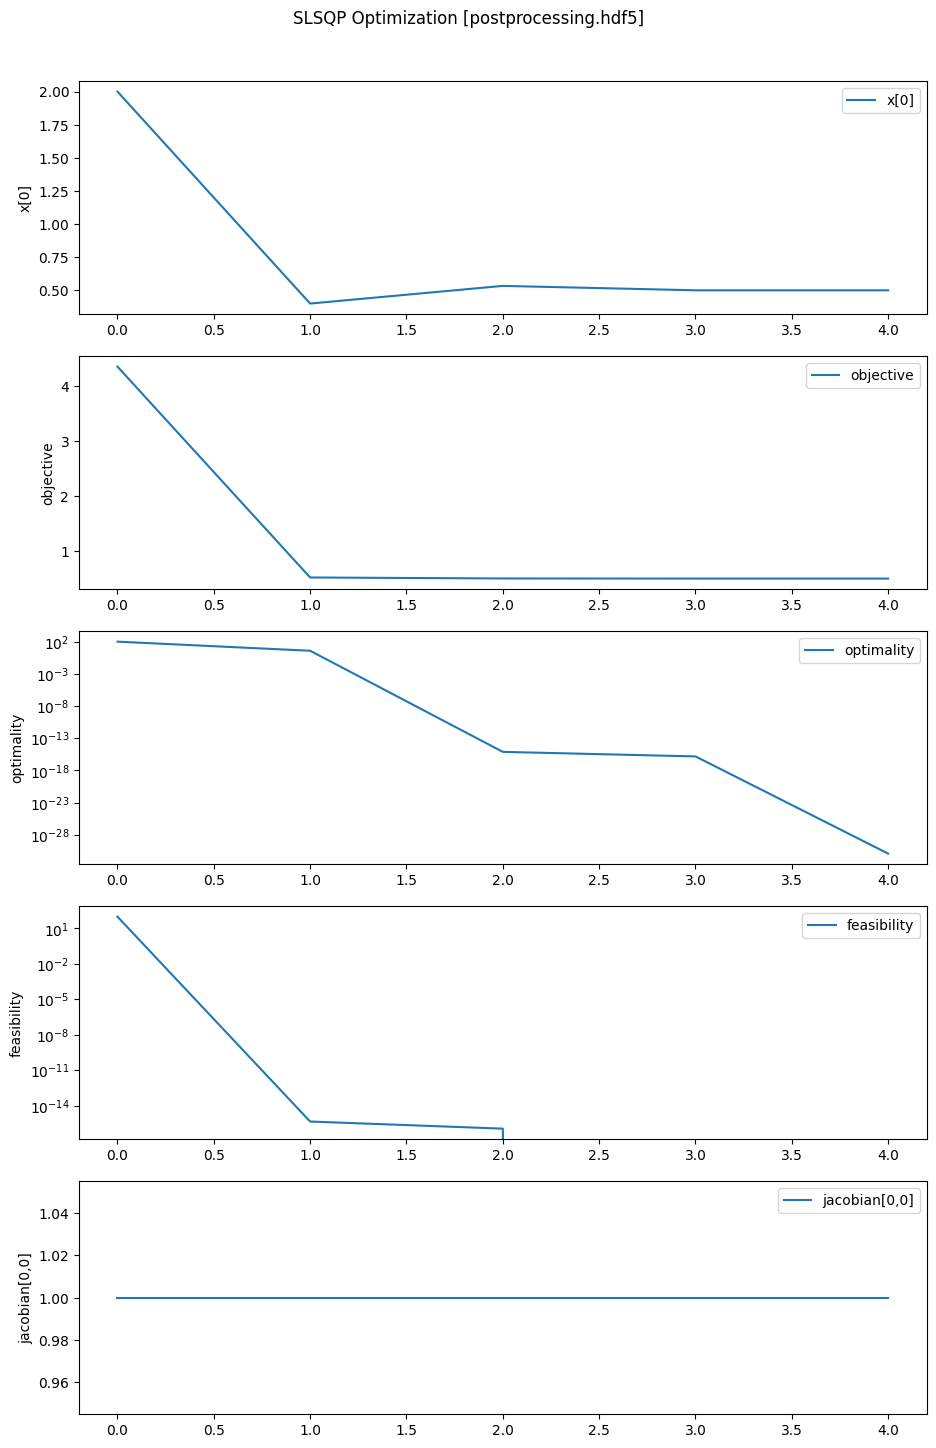

In [6]:
%matplotlib inline

from pyslsqp.postprocessing import visualize
visualize('postprocessing.hdf5', ['x[0]', 'objective', 'optimality', 'feasibility', 'jacobian[0,0]'], itr_start=0, itr_end=-1, major_only=True, save_figname='postprocessing_plot.pdf')

## Restarting optimization - Warm start and Hot start
In many situations, users may need to restart a previously run optimization.
For instance, if the user wants SLSQP to converge to a solution with higher accuracy than before,
they would need to run `optimize()` again, this time with a smaller value for the accuracy parameter `acc`.
Additionally, they might need to increase the value of `maxiter` to ensure that 
the optimization doesn't stop prematurely due to reaching the iteration limit.

In PySLSQP, ***warm starting*** refers to the process of restarting a previously run optimization 
using the most recent value of `x` from a saved file. 
If `warm_start=True` is set, the initial guess `x0` provided by the user is 
replaced with the value of `x` from the *results* in the file specified by `load_filename`. 
If for some reason the *results* data is not available in `load_filename`, 
PySLSQP will use the value of `x` from the last available saved iteration as `x0`.
<!-- Setting `warm_start=True` overwrites the user input `x0` with the value of `x` from the *results*
available in the user specified `load_filename`.
For some reason, if no data on *results* are available in `load_filename`, PySLSQP will
set `x0` as the value of `x` from the last saved iteration available. -->

In the following example, we warm start the optimization from the `postprocessing.hdf5` file saved before.

In [7]:
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, meq=num_eqcon, xl=x_lower, xu=x_upper,
                   warm_start=True, load_filename="postprocessing.hdf5")

Warm starting from previous optimization solution x from postprocessing.hdf5...
Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 2.465190e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 1
            Number of function evaluations       : 1
            Number of derivative evaluations     : 1
            Average Derivative evaluation time   : 0.000050 s per evaluation
            Average Function evaluation time     : 0.000031 s per evaluation
            Total Function evaluation time       : 0.000050 s [  1.73%]
            Total Derivative evaluation time     : 0.000031 s [  1.08%]
            Optimizer time                       : 0.000019 s [  0.67%]
            Processing time                      : 0.002776 s [ 96.52%]
            Visualization time                   : 0.000000 s [  0.00%]
 

We see above that the optimization converged in a single iteration since we started from an already converged solution.

In PySLSQP, ***hot starting*** refers to the process of restarting a previously run optimization 
by reusing the function (objective and constraints) and derivative values available from a previously saved file.
This approach is particularly beneficial when the functions and/or their derivatives are costly to evaluate.
One advantage of hot starting over warm starting is that during a hot start,
the BFGS Hessians approximated by the SLSQP algorithm will follow the same path as in
the previous optimization while also saving the cost of function and derivative evaluations.
In contrast, during a warm start, although the algorithm starts from the previous solution `x`, the Hessian
is initialized as the identity matrix, which might result in more iterations before the
algorithm can converge.

It is very important to note that hot starting in PySLSQP will only work if `save_itr` was set to `"all"`
and `save_vars` included all of `"objective", "constraints", "gradient", and "jacobian"` in the previous optimization run.
This is because a hot start requires function and derivative data from *all* iterations and not just major iterations.
To hot start a problem, set `hot_start=True` when calling `optimize()` and specify `load_filename`
to indicate where the saved data will be reused from.
The following code hot-starts our optimization from the previously saved file `postprocessing.hdf5`.

In [8]:
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, meq=num_eqcon, xl=x_lower, xu=x_upper,
                   hot_start=True, load_filename="postprocessing.hdf5")

Hot starting using saved x, objective, constraints, gradient, and jacobian from postprocessing.hdf5...
Hot start is complete at iteration 7. Starting normal function evaluations...
Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 1.232595e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 4
            Num fun evals (reused in hotstart)   : 4 (4)
            Num deriv evals (reused in hotstart) : 4 (4)
            Average Derivative evaluation time   : 0.000015 s per evaluation
            Average Function evaluation time     : 0.000008 s per evaluation
            Total Function evaluation time       : 0.000060 s [  0.69%]
            Total Derivative evaluation time     : 0.000031 s [  0.35%]
            Optimizer time                       : 0.000096 s [  1.09%]
            Processing time         

We can see from the console output above that all 4 of the function and derivative evaluations required by SLSQP
were reused from the saved file, and were never really computed using the user-provided functions and derivatives.

For more details on any of the post-processing utilities, visit the [API Reference](./api.md) page.